In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

In [2]:
test_dir = "splitdata/test"
train_dir = "splitdata/train"
val_dir = "splitdata/val"

In [3]:
#DISINI SAYA MENGGUNAKAN MODEL VGG16

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False

94781440/94765736 [==============================] - 16s 0us/step


In [4]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])

In [6]:
image_shape = (150,150,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [7]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')

Found 5062 images belonging to 2 classes.


In [8]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 722 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 1448 images belonging to 2 classes.


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.000024),
              metrics=['acc'])

#es = EarlyStopping(monitor='val_acc', mode='max', patience=5, restore_best_weights=True)

In [11]:
results = model.fit(train_image_gen,epochs=100, validation_data=val_image_gen)

Epoch 1/100
159/159 [==============================] - 177s 656ms/step - loss: 0.6664 - acc: 0.6096 - val_loss: 0.6303 - val_acc: 0.7188
Epoch 2/100
159/159 [==============================] - 38s 236ms/step - loss: 0.6265 - acc: 0.6748 - val_loss: 0.6073 - val_acc: 0.7161
Epoch 3/100
159/159 [==============================] - 40s 248ms/step - loss: 0.6016 - acc: 0.7122 - val_loss: 0.5835 - val_acc: 0.7327
Epoch 4/100
159/159 [==============================] - 42s 261ms/step - loss: 0.5881 - acc: 0.7159 - val_loss: 0.5653 - val_acc: 0.7410
Epoch 5/100
159/159 [==============================] - 47s 293ms/step - loss: 0.5751 - acc: 0.7163 - val_loss: 0.5610 - val_acc: 0.7355
Epoch 6/100
159/159 [==============================] - 42s 263ms/step - loss: 0.5686 - acc: 0.7226 - val_loss: 0.6104 - val_acc: 0.6759
Epoch 7/100
159/159 [==============================] - 44s 273ms/step - loss: 0.5631 - acc: 0.7230 - val_loss: 0.5528 - val_acc: 0.7368
Epoch 8/100
159/159 [==========================

Epoch 61/100
159/159 [==============================] - 46s 284ms/step - loss: 0.4817 - acc: 0.7742 - val_loss: 0.4677 - val_acc: 0.7812
Epoch 62/100
159/159 [==============================] - 48s 303ms/step - loss: 0.4772 - acc: 0.7778 - val_loss: 0.4921 - val_acc: 0.7742
Epoch 63/100
159/159 [==============================] - 47s 292ms/step - loss: 0.4793 - acc: 0.7764 - val_loss: 0.4698 - val_acc: 0.7742
Epoch 64/100
159/159 [==============================] - 47s 296ms/step - loss: 0.4731 - acc: 0.7795 - val_loss: 0.4841 - val_acc: 0.7770
Epoch 65/100
159/159 [==============================] - 47s 294ms/step - loss: 0.4685 - acc: 0.7868 - val_loss: 0.4866 - val_acc: 0.7673
Epoch 66/100
159/159 [==============================] - 47s 295ms/step - loss: 0.4762 - acc: 0.7793 - val_loss: 0.4602 - val_acc: 0.7950
Epoch 67/100
159/159 [==============================] - 47s 292ms/step - loss: 0.4691 - acc: 0.7821 - val_loss: 0.4767 - val_acc: 0.7742
Epoch 68/100
159/159 [===================

In [12]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,acc,val_loss,val_acc
0,0.666418,0.609640,0.630336,0.718837
1,0.626510,0.674832,0.607307,0.716066
2,0.601567,0.712169,0.583469,0.732687
3,0.588106,0.715923,0.565341,0.740997
4,0.575119,0.716318,0.560988,0.735457
...,...,...,...,...
95,0.466440,0.781904,0.459397,0.792244
96,0.460653,0.781114,0.451094,0.801939
97,0.457687,0.783880,0.461790,0.782548
98,0.456475,0.792967,0.454801,0.799169


<AxesSubplot:>

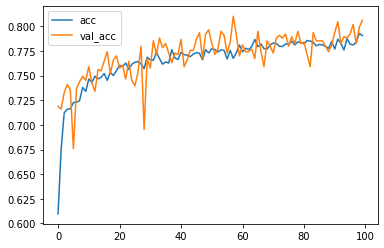

In [13]:
loss_df[['acc', 'val_acc']].plot()

<AxesSubplot:>

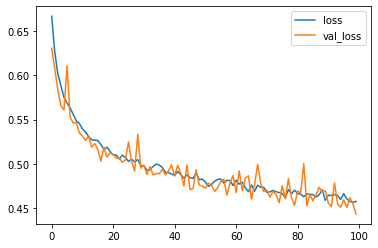

In [14]:
loss_df[['loss', 'val_loss']].plot()

In [15]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       724
           1       0.85      0.74      0.79       724

    accuracy                           0.80      1448
   macro avg       0.81      0.80      0.80      1448
weighted avg       0.81      0.80      0.80      1448



[[627  97]
 [191 533]]


<AxesSubplot:>

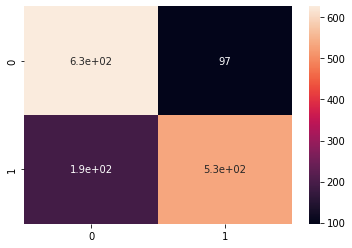

In [16]:
print(confusion_matrix(test_image_gen.classes,predictions))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot = True)

Confusion matrix, without normalization
[[627  97]
 [191 533]]


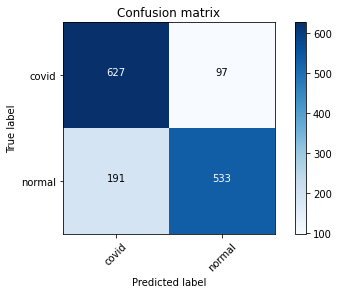

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)

In [18]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_test_rock = os.path.join('splitdata/test/covid')
file_test_paper = os.path.join('splitdata/test/normal')

rock_image = os.listdir(file_test_rock)
paper_image = os.listdir(file_test_paper)

fRock = [os.path.join(file_test_rock,fname)
        for fname in rock_image[0:5]]

fPaper = [os.path.join(file_test_paper,fname)
        for fname in paper_image[0:5]]

xz = 0

In [19]:
from PIL import Image
import time
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

labels = ['Covid', 'Normal']
labels2 = ['Covid', 'Normal']
value = [fRock, fPaper]
input_size = (150, 150)

title = []
prediksi = []
waktu = []
akurasi = []

for x in list(range(len(labels))):
  for gambar in value[x]:
    title.append(labels2[x])
    im = Image.open(gambar)
    X = preprocess(im, input_size)
    X = reshape([X])
    start = time.time()
    Y = model.predict(X)
    end = time.time()
    times = end-start
    prediksi.append(labels[np.argmax(Y)])
    waktu.append(times)
    akurasi.append(np.max(Y))

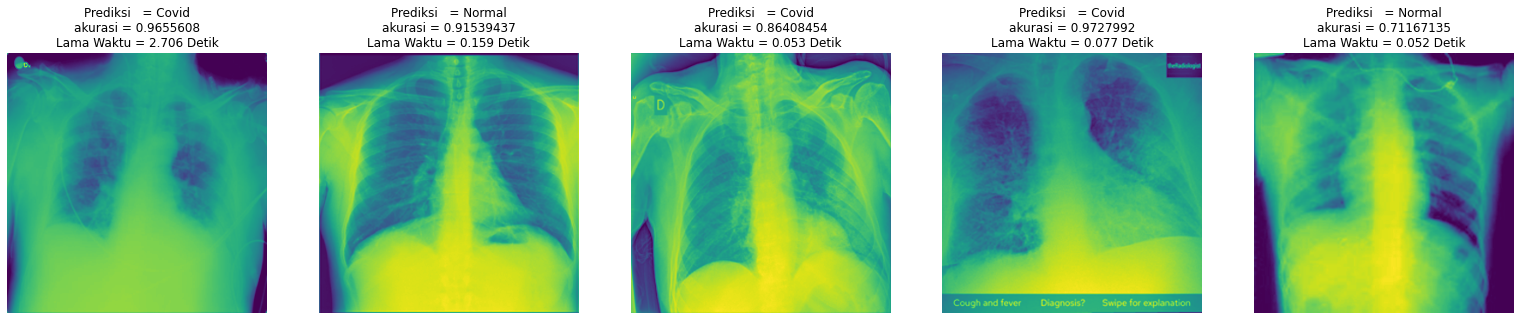

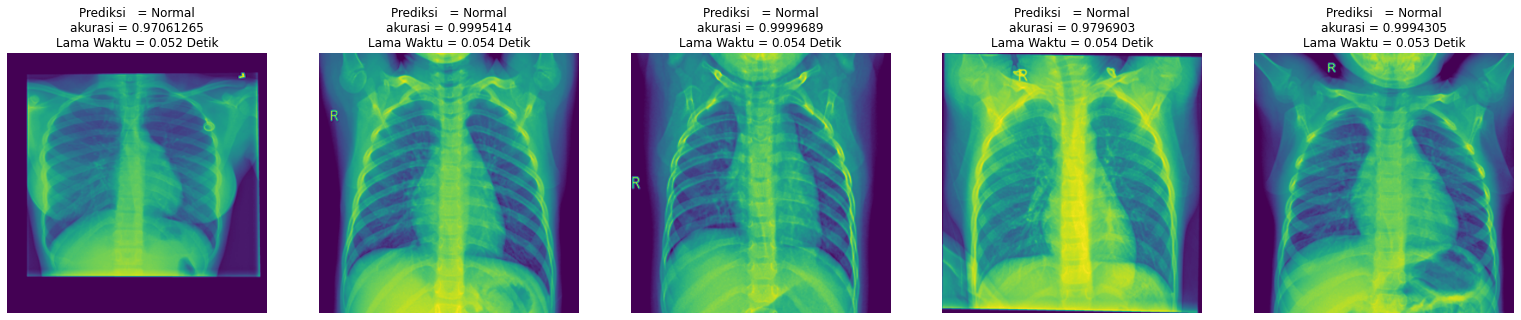

In [20]:
ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fRock):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()

ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fPaper):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()